In [2]:
import numpy as np

## *Задача 1. Геометрический метод сопряженных градиентов*

Рассмотрим геометрический вариант метода сопряженных градиентов и применим его. 

В этом варианте направление $d_k$ задается правилом

$$
\begin{aligned}
d_{k+1} &=\left(1-\lambda_k\right)-r_{k+1}+\lambda_k d_k, \\
\lambda_k &=\frac{\left\|r_{k+1}\right\|^2}{\left\|r_{k+1}\right\|^2+\left\|d_k\right\|^2}
\end{aligned}
$$

Метод имеет геометрическую интерпретацию. Пусть треугольник, натянутый на вектора $-r_{k+1}, d_k$, невырожден. Рассмотрим треугольники $\triangle A B D$ и $\triangle A C D$, изображенные на рисунке. Тогда
$$
\frac{S_{\triangle A B D}}{S_{\triangle A C D}}=\frac{\left\|r_{k+1}\right\|^2}{\left\|d_k\right\|^2}
$$

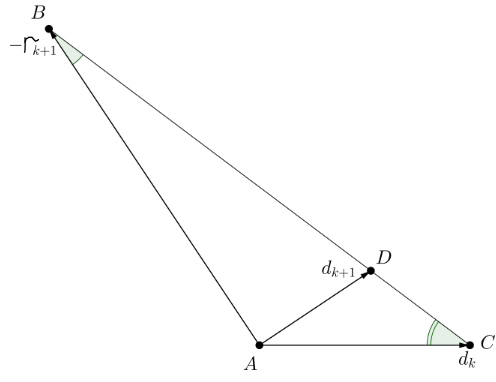

Реализуйте геометрический вариант метода сопряженных градиентов, чтобы минимизировать функционал

$\Phi(x) = (\frac{A + A^*}{2}x, x) - 2(f, x)$

В качестве А, f возьмите случайную матрицу и случайный вектор соответственно. 

Проверьте, что этот минимум решает  СЛАУ:

$Ax = f$

In [95]:
def CG(A, b, x0, tol=1e-5, callback=None, maxit=100):
    x = x0
    r = A.dot(x0) - b
    p = -r
    it = 0
    while np.linalg.norm(r) > tol and it < maxit:
        alpha = r.dot(r) / p.dot(A.dot(p))
        x = x + alpha * p
        if callback is not None:
            callback(x)
        r_next = r + alpha * A.dot(p)
        beta = r_next.dot(r_next) / r.dot(r)
        p = -r_next + beta * p
        r = r_next
        it += 1
    return x

In [96]:
A = np.random.rand(50,50)
A = A + A.T
b = np.random.rand(50)

x= CG(A, b, b)
A@x - b

array([-1.76439005e-07,  6.62752586e-09, -1.21107302e-08, -1.11261438e-07,
        1.42815177e-07,  3.90653337e-08,  3.99583077e-08,  3.59577812e-08,
       -4.69958722e-08, -1.17052364e-07,  5.69959858e-08,  6.74017464e-09,
        1.68573687e-07, -9.63853904e-08,  4.67830705e-08,  1.72818161e-07,
        1.32423766e-07, -1.52569778e-07,  5.63496039e-09,  5.75204829e-08,
       -2.64637739e-07,  1.52305579e-07,  1.08798358e-08, -2.37850971e-08,
        1.87536507e-07,  1.41126504e-07, -3.28359552e-07,  1.46408669e-07,
        5.25437504e-08,  8.50621499e-08,  1.13195093e-07, -1.05096573e-07,
       -2.67820106e-08,  4.89120344e-09,  1.13735688e-09, -6.15196074e-08,
       -1.79350749e-07,  2.09576678e-07,  2.45725273e-08, -7.32632703e-08,
        5.07569177e-08,  1.02826302e-07, -1.78166883e-07,  2.42765727e-07,
       -1.84695137e-07, -6.51895404e-09, -9.78236725e-08, -9.42237409e-08,
        1.45858700e-08, -7.38621561e-08])

## *Задача 2. Метод сопряженных градиентов*

Рассмотрим на примере функции Стайблински-Танга поведение различных вариантов метода сопряженных градиентов. Функция задается выражением
$$
f(x)=\frac{1}{2} \sum_{i=1}^n x_i^4-16 x_i^2+5 x_i .
$$
Глобальным минимум достигается в точке $(\eta, \ldots, \eta)$, где $\eta \approx-2.904$. Использовать данную функцию будем при $n=2$, чтобы наглядно проиллюстрировать результаты.

Напишите все 8 вариантов реализации метода сопряженных градиентов из лекции. Сравните результаты. Функция специально подобрана таким образом, что некоторые из вариантов реализации ответ не смогут получить, а остальные продемонстрируют разное качество работы.

Качество измерьте как количество итераций, необходимое для получения точности
$$
\left\|r_k\right\|<10^{-6}
$$

Линейный поиск берите по усиленным условиям Вулфа с параметрами $\mu=0.4, \nu=0.6$. Обновление методов  только при нарушении свойства убывания. Пусть метод останавливается на итерации $k$, если выполняется условие $\left\|r_k\right\|<10^{-6}$, или по истечению 1000 итераций.

Начальные приближения берите следующие: 

(0.1, -1)

(0.1, -1.1)

(0, -1)

## *Задача 3. Методы сопряженных градиентов и наискорейшего спуска*


На этих рисунках изображены траектории движения в точку минимума методами сопряжённых градиентов и наискорейшего спуска:

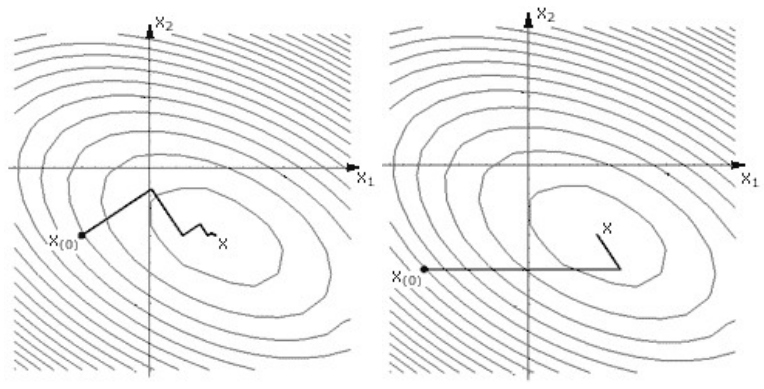

Определите, на каком из них какой из этих двух методов проиллюстрирован.  Ответ аргументируйте. Что изображают замкнутые линии? Докажите, что один из этих двух методов (какой?) позволяет решать квадратичные задачи за конечное число шагов. Каково максимально возможное количество этих шагов для матрицы размера n?


![(from machinelearning.ru)](./10.png)

Curve - a set of points, the tangent to which is perpendicular to the gradient of the function at this point

The first point is gradient descent because the direction of travel is in line with the gradient. The second is the conjugate gradient method, since it found the desired point in two-dimensional space in two iterations.

## *Задача 4. Овражные функции*


Градиентный метод сходится достаточно быстро, если для минимизируемой функции f (x) поверхности уровня близки к сферам (при n = 2 – к окружностям). Если же линии уровня сильно вытянуты в каком-то направлении, то по нормали к этому направлению целевая функция меняется значительно быстрее, чем вдоль направления. Такой характер целевой функции называется овражным. Исходя из рисунка, объясните, почему в этих случаях градиентный метод сходится хуже.


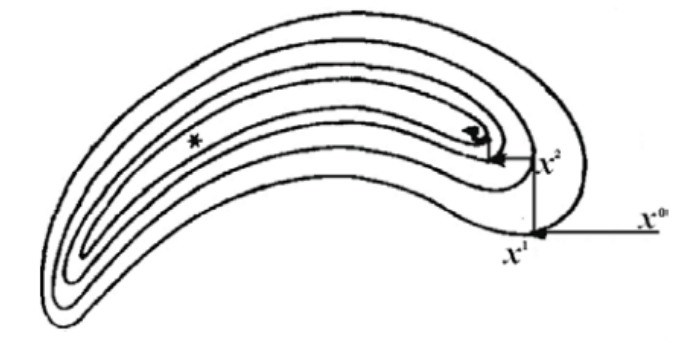

Как связан овражный характер функции с величиной наименьшего сингулярного числа матрицы квадратичной формы? А с величиной числа обусловленности матрицы?
На рисунке ниже изображена работа метода покоординатного спуска для функций овражного характера. Какой вывод можно сделать из этого рисунка?


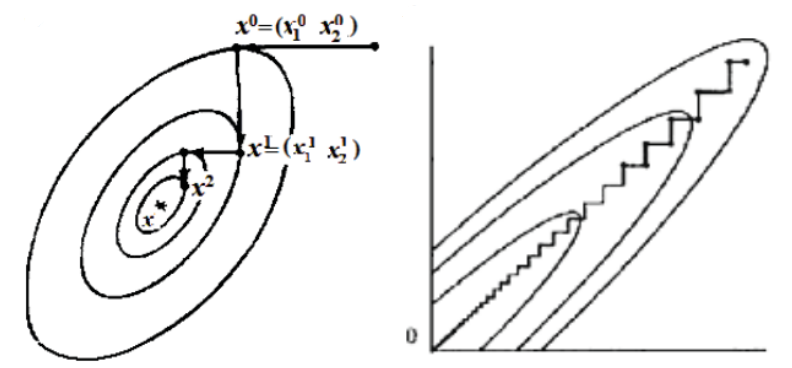 

## *Задача 5. Подпространства Крылова*


Докажите, что для симметричной невырожденной матрицы А, у которой все собственные числа различны, следующий набор векторов является базисом:
$$
v_1=v, v_2=A v_1, v_3=A v_2, \ldots, v_m=A v_{m-1}
$$

Пространством Крылова называется линейная оболочка этих векторов. Какова размерность подпространства Крылова, если есть одинаковые собственные числа? 


Указание: действуя от противного, разложить все слагаемые линейной комбинации этих векторов по базису из собственных векторов симметричной матрицы А.

## *Задача 6. Стохастический градиентный спуск* 

Следуя инструкциям, вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио. Задание уже частично решено, вам остается исправить ошибки.

**1. Загрузите данные из файла 7_advertising.csv в объект pandas DataFrame.** 

In [40]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [41]:
adver_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [42]:
X = adver_data[['TV', 'Radio', 'Newspaper']].values
y = adver_data['Sales'].values

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [43]:
import numpy as np
means, stds = np.mean(X, axis=0), np.std(X, axis=0)
print(means, stds)

[147.0425  23.264   30.554 ] [85.63933176 14.80964564 21.72410606]


In [44]:
X = (X - means)/stds

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [45]:
X = np.hstack((np.ones((X.shape[0], 1)), X))

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [46]:
def mserror(y, y_pred):
    return np.mean((y - y_pred)**2)

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'1 задание'.***

In [47]:
median_sales = np.median(y)
answer1 = mserror(y, median_sales * np.ones((len(y), 1)))
print(answer1)

28.34575


(4,)

**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [49]:
def normal_equation(X, y):
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

In [50]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[14.0225      3.91925365  2.79206274 -0.02253861]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Полученный результат, округленный до 3 знаков после запятой, является ответом на *'2 задание'*.**

In [51]:
answer2 = np.dot(np.array([1, 0, 0, 0]), norm_eq_weights)
print(answer2)

14.0225


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [52]:
def linear_prediction(X, w):
    return np.dot(X, w)

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения?
Полученный результат, округленный до 3 знаков после запятой, является ответом на *'3 задание'***

In [53]:
w = norm_eq_weights
answer3 = mserror(linear_prediction(X, w), y) #косяк с выбором нужного столбца
print(round(answer3, 3))

2.784


**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [54]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    grad0 = (np.sum(w * X[train_ind, :]) - y[train_ind]) / len(y)
    grad1 = X[train_ind, 1] * (np.sum(w * X[train_ind, :]) - y[train_ind]) / len(y)
    grad2 = X[train_ind, 2] * (np.sum(w * X[train_ind, :]) - y[train_ind]) / len(y)
    grad3 = X[train_ind, 3] * (np.sum(w * X[train_ind, :]) - y[train_ind]) / len(y)
    return  w - 2 * eta * np.array([grad0, grad1, grad2, grad3])

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [55]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        tmp_weights = w
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])

        w = stochastic_gradient_step(X, y, w, random_ind, eta)
        errors.append(mserror(linear_prediction(X, w), y))
        
        weight_dist = np.linalg.norm(tmp_weights - w, 2)
        iter_num += 1
        
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [56]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, w_init=[0,0,0,0], eta=1e-2, max_iter=1e5,
                                min_weight_dist=1e-8, seed=42, verbose=False)

CPU times: user 3.33 s, sys: 82.6 ms, total: 3.41 s
Wall time: 3.31 s


**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

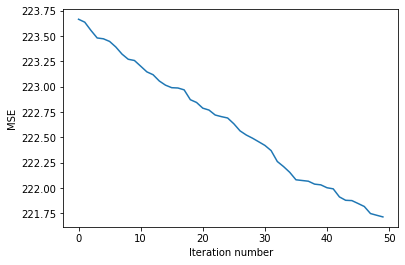

In [57]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

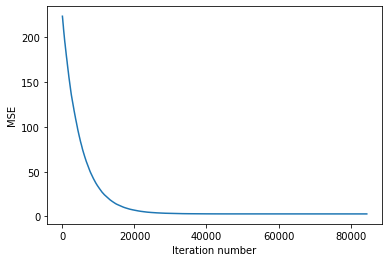

In [58]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [59]:
stoch_grad_desc_weights

array([ 1.40190566e+01,  3.91069256e+00,  2.78209808e+00, -8.10462217e-03])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [60]:
stoch_errors_by_iter[-1]

2.7844125884067044

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'4 задание'*.**

In [61]:
answer4 = stoch_errors_by_iter[-1]
print(round(answer4, 3))

2.784
